In [ ]:
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
random_state1 = 5
random_state2 = 5

The code above sets the seed for the random states for reproducibility

In [ ]:
class Perceptron_Model(nn.Module):
  def __init__(self, input_nodes=8, output_nodes=2):
    super().__init__()
    self.out = nn.Linear(input_nodes, output_nodes)

  def forward(self, x):
    x = F.relu(self.out(x))
    return x

Similar to the first notebook, the perceptron model inherits from the neural network module in PyTorch which serves as a base for neural network modules except in this case, we have 8 features and 2 outputs.

In this notebook however, instead of using sigmoid we use the ReLU activation function to apply to the output of the linear layer which sets all negative values to zero which sets the value range from 0 to infinity

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df = pd.read_csv(url, header=None)

In [ ]:
df.shape

(768, 9)

using df.shape we are able to tell that there are 768 record rows and each record has 9 columns which is the same as the previous notebook as we are using the same dataset

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


df.head() shows us the first 5 records in the dataframe

In [ ]:
X = df.drop(8, axis=1)
y = df[8]

similarly, X= df.drop(8, axis=1) df[8] represents the column with the index 8 which is also our output column and axis=1 specifies that we are targeting a column as the default would be axis=0 which would be a row instead. This will result in X being a new dataframe that contains all the input features without the output value.

y= df[8] would then be a dataframe containing only the output value

In [ ]:
def normalize_df(df):
    for column in df.columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

X = normalize_df(X)

the normalization function created here uses the Z-score calculation method to normalize and return all the values into the dataframe

In [ ]:
X = X.values
y = y.values

then we assign the dataframe x and series y into numpy arrays to carry on with the next portion for machine learning algorithms to be applied.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state1)

import the train_test_split from scikit-learn's model selection module which is used to split arrays or matrices into random train and test subsets and in this case we specify the test data set size to be 20% of the data and the remainder 80% to be assigned for the training data set and then we assign the random_state seed to the variable that we declared earlier.

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

convert the train and test datasets into PyTorch tensors which make them compatible with PyTorch's models and functions for input data

In [ ]:
perceptron_model = Perceptron_Model()

create an instance of perceptron_model which follows the Perceptron_Model we declared above using the declared parameter of input_nodes=8 and output_nodes=2

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(perceptron_model.parameters(), lr=0.001)

Here we use Variable criterion = nn.CrossEntropyLoss() instead of using the Mean Squared Error loss function previously

Variable optimizer = torch.optim.Adam creates an instance of an Adaptive Moment Estimation (Adam) optimizer which is used to update the weights of the neural network and in this case, we pass the perceptron model parameters to the optimizer to be updated during training and set the learning rate (lr) to be 0.001 which controls how much the model's weight are adjusted during each iteration of training. a smaller learning rate means smaller adjustments and vice versa.

-- Additional Information --

CrossEntropyLoss is used for multi-class classification problems whereas MSE loss is typically use for regression tasks where out put is continuous instead of categorical

Adam Optiimzer works by computing adaptive learning rates for each parameter from estiamtes of first and second moments of the gradients and helps in faster convergence. It also combines features from other optimizers like AdaGrad and RMSProp to adaptively adjust the learning rates of the parameters


In [ ]:
torch.manual_seed(random_state2)

In [ ]:
epochs = 10000
losses = []

for i in range(epochs):
  y_pred = perceptron_model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 1000 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 0.6741673946380615
Epoch: 1000 Loss: 0.47154325246810913
Epoch: 2000 Loss: 0.4677528738975525
Epoch: 3000 Loss: 0.46563050150871277
Epoch: 4000 Loss: 0.46554186940193176
Epoch: 5000 Loss: 0.4655422866344452
Epoch: 6000 Loss: 0.4655419886112213
Epoch: 7000 Loss: 0.46554237604141235
Epoch: 8000 Loss: 0.4655422270298004
Epoch: 9000 Loss: 0.46554282307624817


An Epoch specifies the number of iterations over the entire dataset during training.

Here, we declare that looping through the number of epochs to perform the training,

y_pred = perceptron_model.forward(X_train).view(-1) which performs a forward pass through the model to compute the prediction and reshapes the output tensor to a 1 dimensional tensor to ensure it matches the shape of y_train in the next step to compute the loss

loss = criterion(y_pred, y_train) computes the loss between the predicted values of y_pred and the actual y_train values

losses.append(loss.detach().numpy()) detaches the loss tensor fromm the comutation graph to prevent further gradient calculations and converts it back to a numpy array and then appends the loss value to the "losses" list.

if i % 1000 == 0 statement prints the loss value every 1000 epochs.

optimizer.zero_grad() zeros out the gradients of the model parameters as PyTorch accumulates gradients by default hence there is a need to reset them at the start of each training step.

loss.backward() computes the gradient of the loss with respect to the odmel parameters using backpropagation

optimizer.step() updates the model parameters using the computed gradients

This loop basically continues for 1000 epochs and gradually refines the model's paraeters to reduce loss.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline is a command used in jupyter notebook files to display plots directly within the notebook. When the plot is created, it will automatically render the plot in the notebook instead of opening a separate window as shown below.

Text(0.5, 0, 'Epochs')

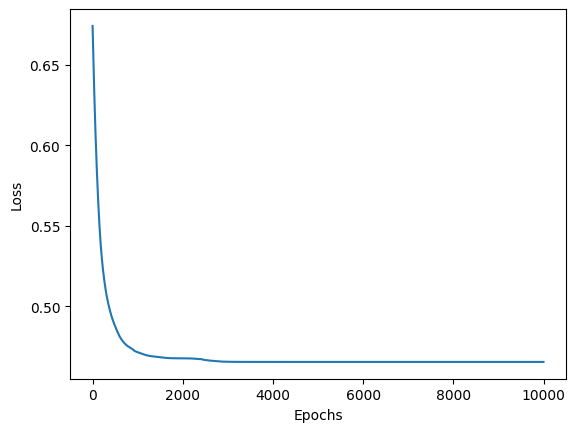

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel('Epochs')

The output of this code plots a line plot where the x axis shows the epochs and the y axis shows the loss values showing the model's performance and typically and as seen above, the loss value can be expected to decrease as the number of epochs increases.

In [ ]:
correct_count = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_pred = perceptron_model.forward(data)
    # print(f'Row: {i} \tActual: {y_test[i]} \tPredict: {y_pred.argmax().item()}')
    if y_pred.argmax().item() == y_test[i]:
      correct_count +=1

print(f'{correct_count} correct predictions')
print(f'{round(correct_count / len(y_test) * 100, 2)}% accuracy')

124 correct predictions
80.52% accuracy


torch.no_grad() is a context manager that disables gradient calculation as during the evaluation phase, there is no need to copute gradients wh en making predictions.

the loop loops over each data point in the X_test set where data is the feature and the y_pred value will be that of the perceptron_model.forward(data) outcome that generates a prediction

if torch.round(y_pred).item() == y_test[i] checks if the rounded prediction matches the actual label

the accuracy is then printed according to the number of correct predictions and the overall accuracy.

In [ ]:
perceptron_model.state_dict()

OrderedDict([('out.weight',
              tensor([[-0.3349, -0.7851,  0.2158,  0.2315,  0.0687, -0.6951, -0.6147, -0.3997],
                      [ 0.3233,  1.3102, -0.5020,  0.1045, -0.1116,  0.5555, -0.1839, -0.2009]])),
             ('out.bias', tensor([ 1.0050, -0.5795]))])

state_dict() method is used to retrieve the state of the model in the form of a Python dictionary object containing all the learnable parameters of the model and any persistent buffers that the model contains